In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime


%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
api_key = '00ef9804fcde0edd93b1b4821ee2f06a'

In [4]:

''' Колонки '''
ticker = 'F'
# ma1 = 30
# ma2 = 150


''' время '''
stime='1999-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = pd.DataFrame(get_data_from_ticker(ticker, stime, ftime, period))
df.head(3)

,F
Date,
1999-01-01 00:00:00-05:00,16.558167
1999-02-01 00:00:00-05:00,16.105303
1999-03-01 00:00:00-05:00,15.392536


change index

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df.head(3)

,F
Date_index,
1999-01-01,16.558167
1999-02-01,16.105303
1999-03-01,15.392536


In [7]:
# df.loc['1999-01-01']

In [8]:
df_st_gr = fa.financial_statement_growth(ticker, api_key, period='annual')

In [9]:
df_st_gr

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
revenueGrowth,0.072335,-0.184452,-0.027679,0.02272,0.03278,0.014991,0.038042,-0.019331,0.094338,-0.014765,0.056687,0.089985,-0.191206,-0.151796,0.077016,-0.095805,0.031675,0.045409,0.004749,0.006206,-0.044995,0.046174,0.125623,-0.059957,0.045146,0.071855,0.067721,0.183541
grossProfitGrowth,0.507087,-0.321356,-0.118908,-0.05404,0.009042,0.093353,0.291177,-0.051055,0.014225,-0.190235,-0.064645,0.339547,-0.046,-0.358042,1.65399,-0.649899,-0.101995,0.041338,-0.102082,0.391097,-0.200581,-0.039293,0.134027,-0.097406,0.232459,0.070191,0.051751,0.251972
ebitgrowth,2.026089,-8.679443,-0.954682,-0.08989,0.068894,0.702628,1.222965,-0.367531,-0.135432,-0.445287,-0.099492,1.501788,3.231383,-1.25934,2.097527,-2.057787,-0.298474,0.316042,-0.176626,2.302458,-1.500099,-0.111444,0.106412,-0.241014,0.360684,0.064795,-0.078776,0.43322
operatingIncomeGrowth,2.026089,-8.679443,-0.954682,-0.08989,0.068894,0.702628,1.222965,-0.367531,-0.135432,-0.445287,-0.099492,1.501788,3.231383,-1.25934,2.097527,-2.057787,-0.298474,0.316042,-0.176626,2.302458,-1.500099,-0.111444,0.106412,-0.241014,0.360684,0.064795,-0.078776,0.43322
netIncomeGrowth,15.024238,-28.212766,-0.987218,-0.516311,0.654047,-0.376645,1.313461,-0.554577,0.263019,-0.719735,2.08078,1.414796,1.185183,-4.388175,0.784112,-7.231719,-0.419558,6.044444,1.505102,0.820282,-2.57283,-0.520934,-0.672104,2.189451,0.556455,0.074173,-0.220234,1.098853
epsgrowth,15.03125,-33.0,-0.989247,-0.513089,0.646552,-0.376344,1.296296,-0.554945,0.22973,-0.722326,1.805263,1.087912,1.140867,-3.681159,0.794643,-7.109091,-0.424084,6.074074,1.490909,0.817881,-2.290598,-0.386287,-0.670336,2.16,0.545699,0.039106,-0.279678,0.393652
epsdilutedGrowth,14.90625,-33.0,-0.98913,-0.515789,0.652174,-0.375,1.3,-0.545455,0.239437,-0.712551,1.975904,0.930233,1.133127,-3.681159,0.794643,-7.4,-0.393064,5.407407,1.490909,0.817881,-2.313043,-0.383396,-0.670045,2.160142,0.543956,0.093093,-0.25,0.345821
weightedAverageSharesGrowth,0.004531,0.000252,0.004612,-0.006618,0.001788,0.001008,0.014571,-0.005845,0.031455,0.0058,0.099739,0.152741,0.316322,0.14856,0.05322,0.017876,0.008743,-0.001092,0.007147,-0.000549,0.227242,-0.219847,-0.000826,0.013389,0.013571,0.10084,0.060396,0.607243
weightedAverageSharesDilutedGrowth,0.015354,-0.007742,0.001817,-0.001078,0.000513,-0.00075,-0.01063,-0.010276,0.017933,-0.023352,-0.016036,0.322444,0.389926,0.14856,0.05322,-0.025222,-0.000066,0.052263,-0.005749,0.012414,0.21263,-0.226419,-0.001398,0.012281,0.015069,0.043994,0.141438,0.486877


In [10]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2021,FY,34.162115,4.494362,3.95565,2.39539,12.426209,12.157103,12.0,12.157103,36.717615,77984143591.899994,196929143591.899994,4.347669,0.571979,4.93977,8.157337,1.607291,1.607291,1.444387,6.38924,12.474133,20.599283,0.230008,0.122589,1.843566,0.810835,3.859094,1.201362,0.641106,0.880136,0.005168,0.022468,0.0,0.0,0.00284,-0.394438,-0.045672,-1.044799,0.002237,35.062296,0.027197,0.069983,-30.030757,18269000000,47892000000,-99417000000,2.874853,48153500000,22276500000,11436500000,117.559978,71.149707,38.409826,3.104798,5.130028,9.502777,0.36969,-1.560261
2020,FY,32.002014,-0.321923,6.108482,4.663227,12.575132,7.724641,7.653914,7.724641,43.607853,41835688808.099998,179590688808.100006,-32.709686,0.329042,1.723832,2.258093,1.36317,1.36317,1.412498,10.822628,7.400004,9.693458,-0.030572,0.442852,3.627631,0.884716,8.301495,1.201169,-0.429797,-18.97498,0.014246,-0.465989,0.0,0.0,0.001504,-0.236598,-0.045161,-0.770015,0.001565,7.480083,-0.025919,-0.004793,-35.688271,19552000000,30409000000,-119706000000,5.311111,52394000000,22204000000,10808000000,150.410637,71.878636,34.987583,2.42669,5.078004,10.432272,-0.041675,-1.445255
2019,FY,39.249748,0.011833,4.440836,2.519386,8.723817,8.354733,8.248741,8.354733,42.105237,35112480794.400002,174329480794.399994,747.074059,0.225224,1.990616,3.508792,1.058083,1.058083,1.118213,9.508535,9.883184,17.420754,0.001339,0.284998,3.085973,0.871469,7.593378,1.16218,0.054558,375.297872,0.068038,50.829787,0.0,0.0,0.001802,-0.432678,-0.048954,-0.89894,0.001462,1.491427,0.003578,0.000182,-34.767623,15915000000,32764000000,-111260000000,4.722646,57641000000,21438500000,10797000000,147.236177,56.021063,29.228616,2.47901,6.515407,12.487762,0.001416,-1.92145


In [11]:
df_key_metr = df_key_metr.loc['2022':'2000'].copy(deep=True)
index_years = df_key_metr.index.to_list()
index_years


['2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000']

In [12]:
# financial_ratios = fa.financial_ratios(ticker, api_key, period='annual')
# financial_ratios = financial_ratios.T
# financial_ratios

In [13]:
# df_fin_rat = financial_ratios
# df_fin_rat = df_fin_rat.loc['2022':'2000'].copy(deep=True)
# index_years = df_fin_rat.index.to_list()
# index_years

stock data detailed

In [14]:
# stock_data = fa.stock_data(ticker, period="max", interval="1mo")
# stock_data

In [15]:
# stock_data_det = fa.stock_data_detailed(ticker, api_key)
# stock_data_det

In [16]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_prices

[19.659067153930664,
 10.146446228027344,
 8.356612205505371,
 7.818579196929932,
 9.092910766601562,
 9.701884269714355,
 8.761106491088867,
 10.372193336486816,
 10.218567848205566,
 8.61666488647461,
 8.112527847290039,
 10.418264389038086,
 7.080500602722168,
 1.221451759338379,
 4.337132930755615,
 5.310375213623047,
 5.422718524932861,
 7.998786926269531,
 8.596184730529785,
 5.187088966369629,
 8.430548667907715,
 14.891737937927246]

In [17]:
df_key_metr[ticker] = list(stock_year_prices)

In [18]:
df_key_metr.drop('period', axis=1, inplace=True)

In [19]:
df_key_metr.tail(3)

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,F
2002,89.840572,-0.538758,10.24354,6.242441,16.778999,3.073117,2.552501,3.073117,89.181968,16389190363.800001,166361190363.799988,-16.723664,0.100289,0.879579,1.443346,2.931877,2.931877,1.017998,11.473977,8.928309,14.650919,-0.059796,0.692835,29.020036,0.961086,10.34361,1.936011,None,-19.013265,0.045335,-0.758163,0.0,0.0,0.022868,-0.390597,-0.044536,-0.479541,0.0,6.10348,0.05215,-0.003466,-93.328615,93924000000,4643000000,-83828000000,29.020036,75744500000,20592500000,8894000000,221.32955,55.363841,20.359286,1.649125,6.592751,17.927937,-0.175313,-4.0011,5.187089
2001,89.237363,-2.996154,12.507692,7.881319,9.981868,4.647253,4.647253,4.647253,119.987912,27063399818,238223399818,-4.963029,0.166634,1.188868,1.88674,3.19974,3.19974,1.466784,19.613321,10.464918,16.607878,-0.20149,0.530015,19.748759,0.969415,17.385147,0.81399,None,-4.174583,0.071277,-0.35375,0.0,0.0,0.0,-0.369882,-0.051843,-0.426329,0.0,17.699926,-0.032621,-0.019718,-134.317857,-8286000000,None,-231825000000,25.819106,27773000000,18940500000,8499500000,7.083713,42.419899,16.752031,51.52665,8.604452,21.788403,-0.644715,-4.626374,8.430549
2000,114.675657,2.337829,22.767363,15.717465,12.115307,12.548887,12.548887,12.548887,147.002697,41968898813.599998,253739898813.600006,12.105249,0.246783,1.243007,1.800545,2.25518,2.25518,1.492026,11.325652,7.515102,10.88592,0.082609,0.555387,8.881193,0.934569,9.452375,0.808449,10.942155,9.738679,0.065549,0.793481,0.0,0.0,0.0,-0.309649,-0.061477,-0.704088,0.0,25.692136,0.064178,0.01219,-161.418071,-9314000000,None,-226501000000,11.640086,29333000000,18639500000,9161000000,13.461285,40.566319,20.219922,27.114796,8.997612,18.051504,0.186298,-7.049899,14.891738


In [20]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                if y != len(v):
                    vv = (v[y] / (v[y+1] / 100)) - 100
                    l.append(vv)
                    # print(vv)
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes = change_percent_all_columns(df_key_metr)

            

In [21]:
df_with_changes

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,F,change % revenuePerShare,change % netIncomePerShare,change % operatingCashFlowPerShare,change % freeCashFlowPerShare,change % cashPerShare,change % bookValuePerShare,change % tangibleBookValuePerShare,change % shareholdersEquityPerShare,change % interestDebtPerShare,change % marketCap,change % enterpriseValue,change % peRatio,change % priceToSalesRatio,change % pocfratio,change % pfcfRatio,change % pbRatio,change % ptbRatio,change % evToSales,change % enterpriseValueOverEBITDA,change % evToOperatingCashFlow,change % evToFreeCashFlow,change % earningsYield,change % freeCashFlowYield,change % debtToEquity,change % debtToAssets,change % netDebtToEBITDA,change % currentRatio,change % interestCoverage,change % incomeQuality,change % dividendYield,change % payoutRatio,change % salesGeneralAndAdministrativeToRevenue,change % researchAndDdevelopementToRevenue,change % intangiblesToTotalAssets,change % capexToOperatingCashFlow,change % capexToRevenue,change % capexToDepreciation,change % stockBasedCompensationToRevenue,change % grahamNumber,change % roic,change % returnOnTangibleAssets,change % grahamNetNet,change % workingCapital,change % tangibleAssetValue,change % netCurrentAssetValue,change % investedCapital,change % averageReceivables,change % averagePayables,change % averageInventory,change % daysSalesOutstanding,change % daysPayablesOutstanding,change % daysOfInventoryOnHand,change % receivablesTurnover,change % payablesTurnover,change % inventoryTurnover,change % roe,change % capexPerShare,change % F
2021,34.162115,4.494362,3.95565,2.39539,12.426209,12.157103,12.0,12.157103,36.717615,77984143591.899994,196929143591.899994,4.347669,0.571979,4.93977,8.157337,1.607291,1.607291,1.444387,6.38924,12.474133,20.599283,0.230008,0.122589,1.843566,0.810835,3.859094,1.201362,0.641106,0.880136,0.005168,0.022468,0.0,0.0,0.00284,-0.394438,-0.045672,-1.044799,0.002237,35.062296,0.027197,0.069983,-30.030757,18269000000,47892000000,-99417000000,2.874853,48153500000,22276500000,11436500000,117.559978,71.149707,38.409826,3.104798,5.130028,9.502777,0.36969,-1.560261,19.659067,6.749891,-1496.098630,-35.243322,-48.632358,-1.184267,57.380815,56.782531,57.380815,-15.800453,86.405784,9.654429,-113.291687,73.831620,186.557418,261.248949,17.908314,17.908314,2.257594,-40.964065,68.569287,112.507071,-852.349922,-72.318259,-49.179882,-8.350772,-53.513260,0.016110,-249.164678,-104.638403,-63.725670,-104.821471,0.0,0,88.816582,66.712418,1.131180,35.685538,42.927619,368.742083,-204.929359,-1560.172078,-15.852587,-6.561989,57.492848,-16.949025,-45.870966,-8.093484,0.326518,5.815137,-21.840648,-1.014112,9.781307,27.943743,1.024501,-8.909811,-987.083111,7.957424,93.753229
2020,32.002014,-0.321923,6.108482,4.663227,12.575132,7.724641,7.653914,7.724641,43.607853,41835688808.099998,179590688808.100006,-32.709686,0.329042,1.723832,2.258093,1.36317,1.36317,1.412498,10.822628,7.400004,9.693458,-0.030572,0.442852,3.627631,0.884716,8.301495,1.201169,-0.429797,-18.97498,0.014246,-0.465989

In [22]:
df_with_changes.columns.to_list()

['revenuePerShare',
 'netIncomePerShare',
 'operatingCashFlowPerShare',
 'freeCashFlowPerShare',
 'cashPerShare',
 'bookValuePerShare',
 'tangibleBookValuePerShare',
 'shareholdersEquityPerShare',
 'interestDebtPerShare',
 'marketCap',
 'enterpriseValue',
 'peRatio',
 'priceToSalesRatio',
 'pocfratio',
 'pfcfRatio',
 'pbRatio',
 'ptbRatio',
 'evToSales',
 'enterpriseValueOverEBITDA',
 'evToOperatingCashFlow',
 'evToFreeCashFlow',
 'earningsYield',
 'freeCashFlowYield',
 'debtToEquity',
 'debtToAssets',
 'netDebtToEBITDA',
 'currentRatio',
 'interestCoverage',
 'incomeQuality',
 'dividendYield',
 'payoutRatio',
 'salesGeneralAndAdministrativeToRevenue',
 'researchAndDdevelopementToRevenue',
 'intangiblesToTotalAssets',
 'capexToOperatingCashFlow',
 'capexToRevenue',
 'capexToDepreciation',
 'stockBasedCompensationToRevenue',
 'grahamNumber',
 'roic',
 'returnOnTangibleAssets',
 'grahamNetNet',
 'workingCapital',
 'tangibleAssetValue',
 'netCurrentAssetValue',
 'investedCapital',
 'avera

Vizualization

In [23]:
df_with_changes = df_with_changes.reindex(index=df_with_changes.index[::-1])

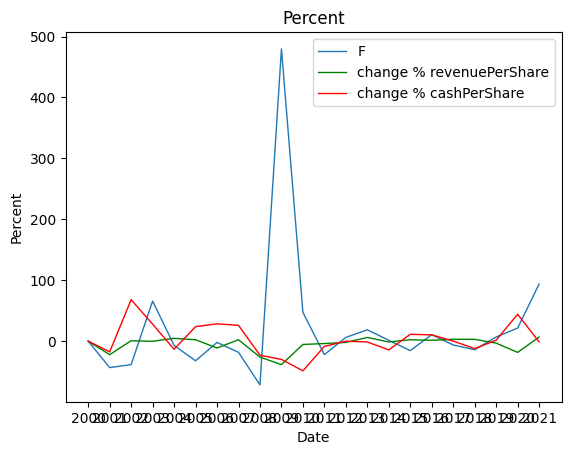

In [25]:
# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')

x = 'change % revenuePerShare'
y = 'change % cashPerShare'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[x],'g',lw=1, label=x)
plt.plot(df_with_changes[y],'r', lw=1, label=y)

# Add a legend to the axis
plt.legend()

plt.show()